#**LINEAR REGRESSION** Michael Julian Peter

***1. Import library***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

***2. Load dataset diabetes dari sklearn***

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
df_diabaetes = pd.DataFrame(np.c_[diabetes['data'], diabetes['target']], 
                            columns = np.append(diabetes['feature_names'], ['target']))
df_diabaetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


***3. Membagi dataset menjadi X dan Y***

In [ ]:
X = diabetes.data[:, np.newaxis, 2]
Y = diabetes.target
print(X.shape)

(442, 1)


***4. Membagi X dan Y untuk train dan test***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

***5. Membuat fungsi cross validation***

In [ ]:
def get_cv(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    
    print('CV = ', scores)
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))

# **Linear Regression**

***1. Menjalankan fungsi ordinary least square***

In [ ]:
lnr_rgr = LinearRegression()
lnr_rgr.fit(X_train, y_train)
y_pred = lnr_rgr.predict(X_test)

get_cv(lnr_rgr)

CV =  [0.45169847 0.2866743  0.38279011 0.44828348 0.33979567]
CV Mean:  0.3818484068758865
STD:  0.06343513418327842


***2. Plotting menggunakan ordinary least square***

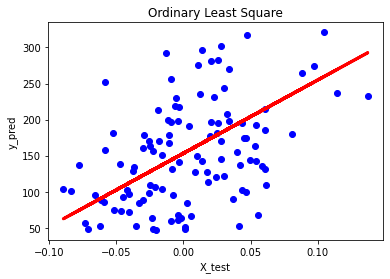

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Ordinary Least Square')
plt.xlabel('X_test')
plt.ylabel('y_pred')
plt.show()

# **Lasso Model**

***1. Menjalankan fungsi lasso***

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
get_cv(lasso)

CV =  [0.37585082 0.31484595 0.28611364 0.34958659 0.26774444]
CV Mean:  0.31882828815326714
STD:  0.03973237413507437


***2. Mencari alpha terbaik***

In [ ]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score:  0.3820354194987357
Best Params:  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


***3. Plotting menggunakan alpha terbaik***

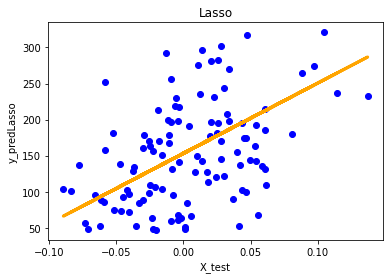

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_predLasso = lasso.predict(X_test)

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_predLasso, color='orange', linewidth=3)
plt.title('Lasso')
plt.xlabel('X_test')
plt.ylabel('y_predLasso')
plt.show()

# **SGD Regressor**

***1. Membuat fungsi SGD regressor***

In [ ]:
SGDrgr = SGDRegressor(max_iter=10000)
SGDrgr.fit(X_train, y_train)
y_predSGD = regr.predict(X_test)

get_cv(SGDrgr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


CV =  [0.44330646 0.326723   0.35731486 0.42839308 0.32549956]
CV Mean:  0.37624739268609364
STD:  0.050204659191282267


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


***2. Plotting menggunakan SGD Regressor***

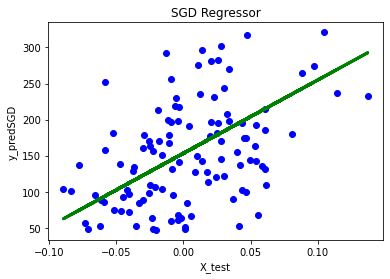

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_predSGD, color='green', linewidth=3)
plt.title('SGD Regressor')
plt.xlabel('X_test')
plt.ylabel('y_predSGD')
plt.show()

# **Ridge Regression**

***1. Menjalankan fungsi ridge***

In [ ]:
ridge = Ridge(alpha=1)
get_cv(ridge)

CV =  [0.2822878  0.2452495  0.20904864 0.25671377 0.19857479]
CV Mean:  0.2383749003042941
STD:  0.03084151525901729


***2. Mencari alpha terbaik***

In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.3821912016052864
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


***3. Plotting dengan alpha terbaik***

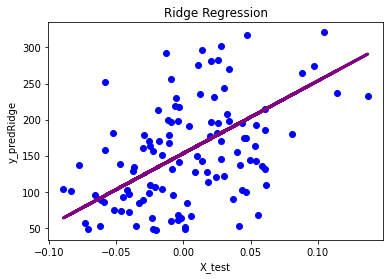

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
y_predRidge = ridge.predict(X_test)

plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_predRidge, color='purple', linewidth=3)
plt.title('Ridge Regression')
plt.xlabel('X_test')
plt.ylabel('y_predRidge')
plt.show()

*Melalui 4 metode diatas, didapatkan hasil plottingan yang hampir sama karena menghasilkan score R2 (Best Score) sekitar 0.38*